# INDIAN PREMIERE LEAGUE - DATA ANALYSIS

In [2]:
# Importing necessery packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

In [3]:
# Loading the dataset 
matches=pd.read_csv('ipl/matches.csv')
print("Matches shape : ",matches.shape)
delivery=pd.read_csv('ipl/deliveries.csv')
print("Delivery shape : ",delivery.shape)

Matches shape :  (577, 18)
Delivery shape :  (136598, 21)


In [4]:
# Some basic information about dataset
matches.info()
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 18 columns):
id                 577 non-null int64
season             577 non-null int64
city               570 non-null object
date               577 non-null object
team1              577 non-null object
team2              577 non-null object
toss_winner        577 non-null object
toss_decision      577 non-null object
result             577 non-null object
dl_applied         577 non-null int64
winner             574 non-null object
win_by_runs        577 non-null int64
win_by_wickets     577 non-null int64
player_of_match    574 non-null object
venue              577 non-null object
umpire1            577 non-null object
umpire2            577 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 81.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136598 entries, 0 to 136597
Data columns (total 21 columns):
match_id            1365

In [5]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [6]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,3,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,1,1,NaN,NaN,NaN
3,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,4,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,5,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [7]:
# Dropping umpire3 
matches.drop('umpire3', axis=1, inplace=True)
# Filling any nan values by 0
delivery.fillna(0, inplace=True)

In [8]:
matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri


In [9]:
delivery.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,1,SC Ganguly,BB McCullum,P Kumar,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,Kolkata Knight Riders,Royal Challengers Bangalore,1,2,BB McCullum,SC Ganguly,P Kumar,0,...,0,0,0,0,0,0,0,0,0,0


# GENERAL ANALYSIS  

In [10]:
# Name of all teams played
print('Teams :',matches['team1'].unique())

Teams : ['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Deccan Chargers' 'Kings XI Punjab'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kochi Tuskers Kerala'
 'Pune Warriors' 'Sunrisers Hyderabad' 'Rising Pune Supergiants'
 'Gujarat Lions']


In [11]:
# Name of all the cities 
print('City :',matches['city'].unique())

City : ['Bangalore' 'Chandigarh' 'Delhi' 'Mumbai' 'Kolkata' 'Jaipur' 'Hyderabad'
 'Chennai' 'Cape Town' 'Port Elizabeth' 'Durban' 'Centurion' 'East London'
 'Johannesburg' 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur'
 'Dharamsala' 'Kochi' 'Indore' 'Visakhapatnam' 'Pune' 'Raipur' 'Ranchi'
 'Abu Dhabi' 'Sharjah' nan 'Rajkot' 'Kanpur']


In [12]:
# Total different umpires 
print('Umpires :',matches['umpire1'].unique())

Umpires : ['Asad Rauf' 'MR Benson' 'Aleem Dar' 'SJ Davis' 'BF Bowden' 'IL Howell'
 'DJ Harper' 'RE Koertzen' 'BR Doctrove' 'AV Jayaprakash' 'BG Jerling'
 'M Erasmus' 'HDPK Dharmasena' 'S Asnani' 'GAV Baxter' 'SS Hazare'
 'K Hariharan' 'SL Shastri' 'SK Tarapore' 'S Ravi' 'SJA Taufel' 'S Das'
 'AM Saheba' 'PR Reiffel' 'JD Cloete' 'AK Chaudhary' 'VA Kulkarni'
 'BNJ Oxenford' 'AK Chowdhary' 'CK Nandan' 'C Shamshuddin' 'NJ Llong'
 'RK Illingworth' 'RM Deshpande' 'K Srinath' 'SD Fry' 'CB Gaffaney'
 'PG Pathak' 'Nitin Menon' 'K Bharatan' 'AY Dandekar'
 'KN Ananthapadmanabhan' 'A Nand Kishore']


In [13]:
# No of matches won by each team 
matches['winner'].value_counts()

Mumbai Indians                 80
Chennai Super Kings            79
Royal Challengers Bangalore    70
Kolkata Knight Riders          68
Rajasthan Royals               63
Kings XI Punjab                63
Delhi Daredevils               56
Sunrisers Hyderabad            34
Deccan Chargers                29
Pune Warriors                  12
Gujarat Lions                   9
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [14]:
# Team which has highest number of wins 
print(((matches['winner']).value_counts()).idxmax(),': has the highest number of match wins')

Mumbai Indians : has the highest number of match wins


In [15]:
# Team which has won by maximum run 
df=matches.iloc[matches['win_by_runs'].idxmax()]
print(df['team1'],'won by maximum runs of',df['win_by_runs'],'against',df['team2'])

Royal Challengers Bangalore won by maximum runs of 144 against Gujarat Lions


In [16]:
# Team which has won by maximum wickets 
df=matches.iloc[matches['win_by_wickets'].idxmax()]
print(df['team1'],'won against',df['team2'],'by maximum',df['win_by_wickets'],'wickets')

Mumbai Indians won against Deccan Chargers by maximum 10 wickets


In [17]:
# Player with maximum man of the match titles 
print(((matches['player_of_match']).value_counts()).idxmax(),'has maximum man of the match awards')

CH Gayle has maximum man of the match awards


# Venues

In [18]:
# Total No. of different venues been played 
print('Total Venues :',matches['venue'].nunique())

Total Venues : 35


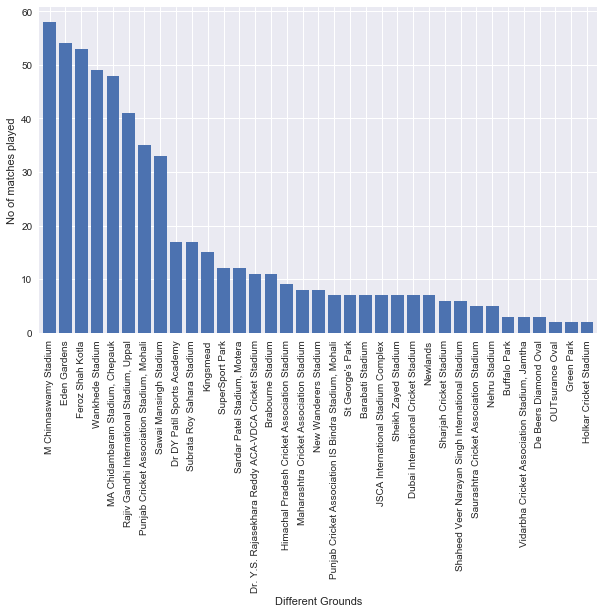

In [59]:
# Number of matches played per grounds 
ax=plt.subplots(figsize=(10,6))
ax=matches['venue'].value_counts().plot(kind='bar', width=.8)
ax.set_ylabel('No of matches played')
ax.set_xlabel('Different Grounds')

## Win percentage of Mumbai Indians in Wankhede Stadium (Home Ground)

([<matplotlib.patches.Wedge at 0x7fab500a6b70>,
  <matplotlib.text.Text at 0x7fab50157ba8>])

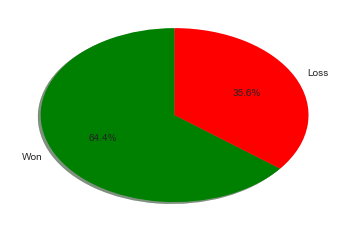

In [19]:
# Win percentage of home team Mumbai Indians in Wankede stadium 
#--------------------------------------------------------------------------------------------
# Total matches palyed at wankhede stadium
df=matches[matches['venue']=='Wankhede Stadium']
total=df.shape[0]
#print(total)
#--------------------------------------------------------------------------------------------
# Matches played by mumbai indians in wankhede stadium 
totalMI=df[df['team1']=='Mumbai Indians'].shape[0]+df[df['team2']=='Mumbai Indians'].shape[0]
#print(totalMI)
#--------------------------------------------------------------------------------------------
# Matches won by Mumbai Indians in wankhede stadium
miWon=df[df['winner']=='Mumbai Indians'].shape[0]
#print(miWon)
#--------------------------------------------------------------------------------------------
# Win Percentage pie chart 
slices=[miWon,(totalMI-miWon)]
labels=['Won','Loss']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0), autopct='%1.1f%%', colors=['g','r'])

Thus, percentage win of team Mumbai Indians in Wankhede Statdium is <b>64.4%</b>.

# TOSS 

([<matplotlib.patches.Wedge at 0x7fab4fec1cf8>,
  <matplotlib.text.Text at 0x7fab500499b0>])

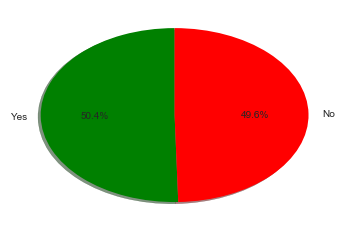

In [59]:
# is toss winner also a match winner ??
#------------------------------------------------------------------------------------------------------------
df2=matches[matches['toss_winner']==matches['winner']]
slices=[len(df2),(577-len(df2))]
labels=['Yes','No']
plt.pie(slices,labels=labels,startangle=90,shadow=True,explode=(0,0),autopct='%1.1f%%',colors=['g','r'])

# Man Of The Match

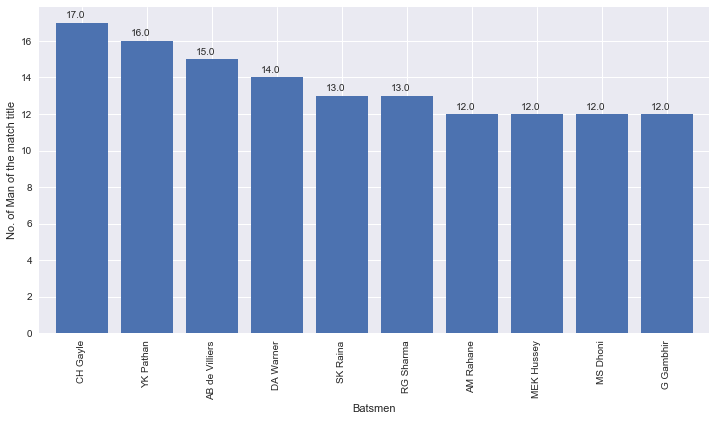

In [42]:
# Display player name of maximum man of the match title winner 
#------------------------------------------------------------------------------------------------------------
plt.subplots(figsize=(12,6))
df3= matches['player_of_match'].value_counts().head(10).plot(kind='bar',width=.8)
df3.set_xlabel('Batsmen')
df3.set_ylabel('No. of Man of the match title')
for p in df3.patches:
    df3.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

# Teams winning IPL titles per season 

In [58]:
for i in range(2008,2017):
    df=((matches[matches['season']==i]).iloc[-1]) 
    print(df[[1,10]])

season                2008
winner    Rajasthan Royals
Name: 57, dtype: object
season               2009
winner    Deccan Chargers
Name: 114, dtype: object
season                   2010
winner    Chennai Super Kings
Name: 174, dtype: object
season                   2011
winner    Chennai Super Kings
Name: 247, dtype: object
season                     2012
winner    Kolkata Knight Riders
Name: 321, dtype: object
season              2013
winner    Mumbai Indians
Name: 397, dtype: object
season                     2014
winner    Kolkata Knight Riders
Name: 457, dtype: object
season              2015
winner    Mumbai Indians
Name: 516, dtype: object
season                   2016
winner    Sunrisers Hyderabad
Name: 576, dtype: object
